In [20]:
# Import libraries necessary for Webscraping and working with CSV Files
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# Define the URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/List_of_Nobel_laureates_in_Literature"

# Send a GET request to fetch the contents of the page
response = requests.get(url)

# Parse the page content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

In [24]:
# BeautifulSoup to find the table containing the data
table = soup.find('table', {'class': 'wikitable'})

In [26]:
# Create list to store data extracted from the table
data = []

In [28]:
# Loop through each row of the table (except the header row)
for row in table.find_all('tr')[1:]:  # [1:] skips the header row
    # Extract all cells (columns) in the current row
    cells = row.find_all(['th', 'td'])
    
    # Skip rows with no data
    if len(cells) == 0:
        continue

    # Extract the year from the first cell
    year_cell = cells[0]
    year_link = year_cell.find('a')  # Some years have links
    year = year_link.text.strip() if year_link else year_cell.text.strip()

    # Handle cases where a year spans multiple laureates (rowspan attribute)
    rowspan = int(year_cell.get('rowspan', 1))

    # Extract other details like laureate name, country, language, citation, and genres
    laureate = cells[2].get_text(strip=True) if len(cells) > 2 else "N/A"
    country = cells[3].get_text(strip=True) if len(cells) > 3 else "N/A"
    language = cells[4].get_text(strip=True) if len(cells) > 4 else "N/A"
    citation = cells[5].get_text(strip=True) if len(cells) > 5 else "N/A"
    genres = cells[6].get_text(strip=True) if len(cells) > 6 else "N/A"

    # Append the extracted data to the list
    data.append([year, laureate, country, language, citation, genres])

    # Process additional rows in cases where there are multiple laureates (rowspan)
    for _ in range(rowspan - 1):
        # Move to the next row and extract data in the same manner
        next_row = row.find_next_sibling('tr')
        row = next_row
        next_cells = row.find_all(['th', 'td'])

        laureate = next_cells[1].get_text(strip=True) if len(next_cells) > 1 else "N/A"
        country = next_cells[2].get_text(strip=True) if len(next_cells) > 2 else "N/A"
        language = next_cells[3].get_text(strip=True) if len(next_cells) > 3 else "N/A"
        citation = next_cells[4].get_text(strip=True) if len(next_cells) > 4 else "N/A"
        genres = next_cells[5].get_text(strip=True) if len(next_cells) > 5 else "N/A"

        data.append([year, laureate, country, language, citation, genres])

In [38]:
# Create a DataFrame to organize the data
df = pd.DataFrame(data, columns=["Year", "Laureate", "Country", "Language", "Citation", "Genres"])

# Display the first 15 rows in Jupyter Notebook
df.head(10)

,Year,Laureate,Country,Language,Citation,Genres
0,1901,Sully Prudhomme(1839–1907),France,French,"""in special recognition of his poetic composit...","poetry, essay"
1,1902,Theodor Mommsen(1817–1903),Germany,German,"""the greatest living master of the art of hist...","history, law"
2,1903,Bjørnstjerne Bjørnson(1832–1910),Norway,Norwegian,"""as a tribute to his noble, magnificent and ve...","poetry, novel, drama"
3,1904,Frédéric Mistral(1830–1914),France,Provençal,"""in recognition of the fresh originality and t...","poetry,philology"
4,1904,José Echegaray(1832–1916),Spain,Spanish,"""in recognition of the numerous and brilliant ...",drama
5,,Spain,Spanish,"""in recognition of the numerous and brilliant ...",drama,N/A
6,1905,Henryk Sienkiewicz(1846–1916),Poland,Polish,"""because of his outstanding merits as an epic ...",novel
7,1906,Giosuè Carducci(1835–1907),Italy,Italian,"""not only in consideration of his deep learnin...",poetry
8,1907,Rudyard Kipling(1865–1936),United Kingdom,English,"""in consideration of the power of observation,...","novel, short story, poetry"
9,1908,Rudolf Christoph Eucken(1846–1926),Germany,German,"""in recognition of his earnest search for trut...",philosophy


In [40]:
# Define the file name for the CSV
csv_file = "nobel_laureates_literature.csv"

# Save the DataFrame to a CSV file
df.to_csv(csv_file, index=False, encoding='utf-8')

# Print a success message
print(f"Data has been successfully saved to {csv_file}.")

Data has been successfully saved to nobel_laureates_literature.csv.


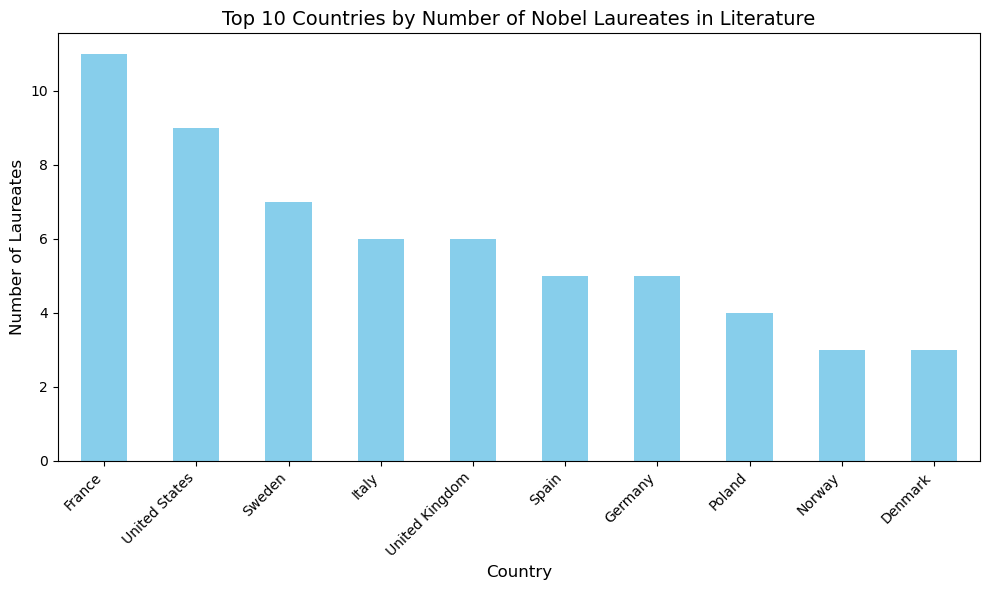

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
file_path = 'nobel_laureates_literature.csv'  # Replace with your file path
nobel_data = pd.read_csv(file_path)

# Count the number of laureates per country
country_counts = nobel_data['Country'].value_counts().head(10)

# Plot the bar chart for the top 10 countries
plt.figure(figsize=(10, 6))
country_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Number of Nobel Laureates in Literature', fontsize=14)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Number of Laureates', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Display the plot
plt.show()
